# Importing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv('matches.csv')
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

# Data Cleaning

In [4]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop(columns='notes')


In [7]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [8]:
df.attendance.describe()

count     3155.000000
mean     38397.586688
std      17595.849137
min       2000.000000
25%      25513.500000
50%      36347.000000
75%      53235.500000
max      75546.000000
Name: attendance, dtype: float64

In [9]:
mean_attendance = df['attendance'].mean()
df['attendance'].fillna(mean_attendance, inplace=True)

In [10]:
df.dist.describe()

count    4786.000000
mean       17.356247
std         3.049341
min         5.300000
25%        15.400000
50%        17.200000
75%        19.100000
max        39.900000
Name: dist, dtype: float64

In [11]:
mean_distance = df['dist'].mean()
df['dist'].fillna(mean_distance, inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0      0
date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [13]:
df.groupby(['season'])['date'].value_counts().head(10)

season  date      
2020    2020-07-26    20
        2019-12-26    18
        2020-01-01    18
        2020-02-01    16
        2020-01-18    16
        2019-11-23    16
        2019-11-02    16
        2019-10-19    16
        2019-09-28    16
        2019-08-31    16
Name: count, dtype: int64

- season Column done wrong according to the date. 

In [14]:
df = df.drop(columns='season')

In [15]:
def split_date(x):

    x = x.split("-")
    x=x[0]
    return x
df['Seasons'] = df['date'].apply(lambda x : split_date(x))
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,referee,match report,sh,sot,dist,fk,pk,pkatt,team,Seasons
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,Manchester City,2020
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,Manchester City,2020
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Mike Dean,Match Report,23,1,18.2,1,0,0,Manchester City,2020
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,Manchester City,2020
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,Manchester City,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Anthony Taylor,Match Report,12,3,16.9,1,0,0,Norwich City,2020
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Kevin Friend,Match Report,11,2,19.8,1,0,0,Norwich City,2020
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Jonathan Moss,Match Report,2,0,20.6,0,0,0,Norwich City,2020
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Kevin Friend,Match Report,6,2,13.4,0,0,0,Norwich City,2020


# Analysis

### Competition Analysis

In [16]:
df.comp.value_counts()

comp
Premier League    4788
Name: count, dtype: int64

- Premier League Competition only 

## Season 2020 Analysis

In [17]:
season2020_df = df[df['Seasons']=='2020']
season2021_df = df[df['Seasons']=='2021']
season2022_df = df[df['Seasons']=='2022']
season2023_df = df[df['Seasons']=='2023']
season2024_df = df[df['Seasons']=='2024']
season2020_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,referee,match report,sh,sot,dist,fk,pk,pkatt,team,Seasons
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,Manchester City,2020
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,Manchester City,2020
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Mike Dean,Match Report,23,1,18.2,1,0,0,Manchester City,2020
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,Manchester City,2020
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,Manchester City,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Anthony Taylor,Match Report,12,3,16.9,1,0,0,Norwich City,2020
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Kevin Friend,Match Report,11,2,19.8,1,0,0,Norwich City,2020
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Jonathan Moss,Match Report,2,0,20.6,0,0,0,Norwich City,2020
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Kevin Friend,Match Report,6,2,13.4,0,0,0,Norwich City,2020


In [18]:
standings2020_df = season2020_df.groupby('team').agg(
    goals_scored=('gf', 'sum'),
    goals_conceded=('ga', 'sum'),
    wins=('result', lambda x: (x == 'W').sum()),
    draws=('result', lambda x: (x == 'D').sum()),
    losses=('result', lambda x: (x == 'L').sum())
    
)

standings2020_df['points'] = standings2020_df['wins'] * 3 + standings2020_df['draws']
standings2020_df['goal_difference'] = standings2020_df['goals_scored'] - standings2020_df['goals_conceded']
standings2020_df = standings2020_df.sort_values(by=['points', 'goal_difference'], ascending=False)
standings2020_df = standings2020_df.reset_index()
standings2020_df['rank'] = standings2020_df.index + 1


standings2020_df

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Liverpool,150,78,46,16,8,154,72,1
1,Manchester City,138,48,40,12,12,132,90,2
2,Manchester United,130,72,38,16,12,130,58,3
3,Chelsea,130,88,32,18,18,114,42,4
4,Tottenham Hotspur,102,66,30,20,16,110,36,5
5,Leicester City,106,84,28,14,26,98,22,6
6,Southampton,77,60,23,13,14,82,17,7
7,Everton,73,64,24,10,14,82,9,8
8,Arsenal,62,56,21,9,20,72,6,9
9,Wolverhampton Wanderers,52,57,20,11,19,71,-5,10


In [19]:
standings2020_df.describe()

,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000
mean,67.217391,63.173913,18.608696,11.565217,17.260870,67.391304,4.043478,12.00000
std,41.417998,16.013211,12.694806,5.508886,5.785699,41.175610,36.223396,6.78233
min,5.000000,31.000000,2.000000,2.000000,8.000000,8.000000,-48.000000,1.00000
25%,35.000000,56.500000,7.000000,9.000000,14.000000,36.500000,-22.000000,6.50000
50%,60.000000,64.000000,17.000000,12.000000,17.000000,66.000000,0.000000,12.00000
75%,89.500000,75.000000,26.000000,15.000000,19.500000,90.000000,19.500000,17.50000
max,150.000000,88.000000,46.000000,23.000000,35.000000,154.000000,90.000000,23.00000


In [20]:
print(standings2020_df.groupby('team')['goals_scored'].sum().idxmax(),'with',standings2020_df.groupby('team')['goals_scored'].sum().max(),'Goals Scored')

Liverpool with 150 Goals Scored


In [21]:
print(standings2020_df.groupby('team')['goals_conceded'].sum().idxmin(),'with',standings2020_df.groupby('team')['goals_conceded'].sum().min(),'Goals Conceded')


Watford with 31 Goals Conceded


### Teams Stats

In [22]:
team_stats = season2020_df.groupby('team').agg(
    total_shots=('sh', 'sum'),
    total_shots_on_target=('sot', 'sum'),
    average_Shot_distance=('dist', 'mean'),
    total_fk_taken=('fk', 'sum'),
    total_pk_taken=('pk', 'sum'),  
)
team_stats

,total_shots,total_shots_on_target,average_Shot_distance,total_fk_taken,total_pk_taken
team,,,,,
Arsenal,507,173,16.854000,35,7
Aston Villa,637,210,16.756522,22,7
Bournemouth,172,50,16.816667,8,3
Brighton and Hove Albion,605,161,17.494000,12,8
Burnley,464,150,17.335417,26,2
Chelsea,1022,354,16.955882,44,16
Crystal Palace,493,168,16.890250,26,4
Everton,518,205,16.610417,19,5
Fulham,334,102,19.106667,14,4


In [23]:
team_most_shots=team_stats.groupby('team')['total_shots'].sum().idxmax()
most_shots=team_stats.groupby('team')['total_shots'].sum().max()
print(team_most_shots,'With',most_shots,'shots')

Manchester City With 1110 shots


In [24]:
team_most_shots_onTarget=team_stats.groupby('team')['total_shots_on_target'].sum().idxmax()
most_shots_onTarget=team_stats.groupby('team')['total_shots_on_target'].sum().max()
print(team_most_shots_onTarget,'With',most_shots_onTarget,'shots on target')

Liverpool With 408 shots on target


In [25]:
team_most_Longshots=team_stats.groupby('team')['average_Shot_distance'].sum().idxmax()
most_Longshots=team_stats.groupby('team')['average_Shot_distance'].sum().max()
print(team_most_Longshots,'With',most_Longshots,'yards average shots')

West Bromwich Albion With 20.25 yards average shots


In [26]:
team_most_fk=team_stats.groupby('team')['total_fk_taken'].sum().idxmax()
most_fk=team_stats.groupby('team')['total_fk_taken'].sum().max()
print(team_most_fk,'With',most_fk,'Freekick')

Tottenham Hotspur With 52 Freekick


In [27]:
team_most_pk=team_stats.groupby('team')['total_pk_taken'].sum().idxmax()
most_pk=team_stats.groupby('team')['total_pk_taken'].sum().max()
print(team_most_pk,'With',most_pk,'Penatlies')

Leicester City With 20 Penatlies


## Season 2021 Analysis

Standings for 2021:


,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,175,52,56,2,10,170,123,1
1,Chelsea,97,50,36,16,12,124,47,2
2,Manchester United,114,68,33,20,11,119,46,3
3,Arsenal,110,63,35,12,16,117,47,4
4,West Ham United,112,77,35,10,18,115,35,5
5,Liverpool,112,60,34,11,18,113,52,6
6,Tottenham Hotspur,106,80,31,9,23,102,26,7
7,Leicester City,109,93,29,12,21,99,16,8
8,Leeds United,82,84,25,13,24,88,-2,9
9,Brighton and Hove Albion,61,60,19,23,20,80,1,10


Manchester City with 175 Goals Scored
Brentford with 25 Goals Conceded


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=standings_df, x='team', y='points', palette='viridis')


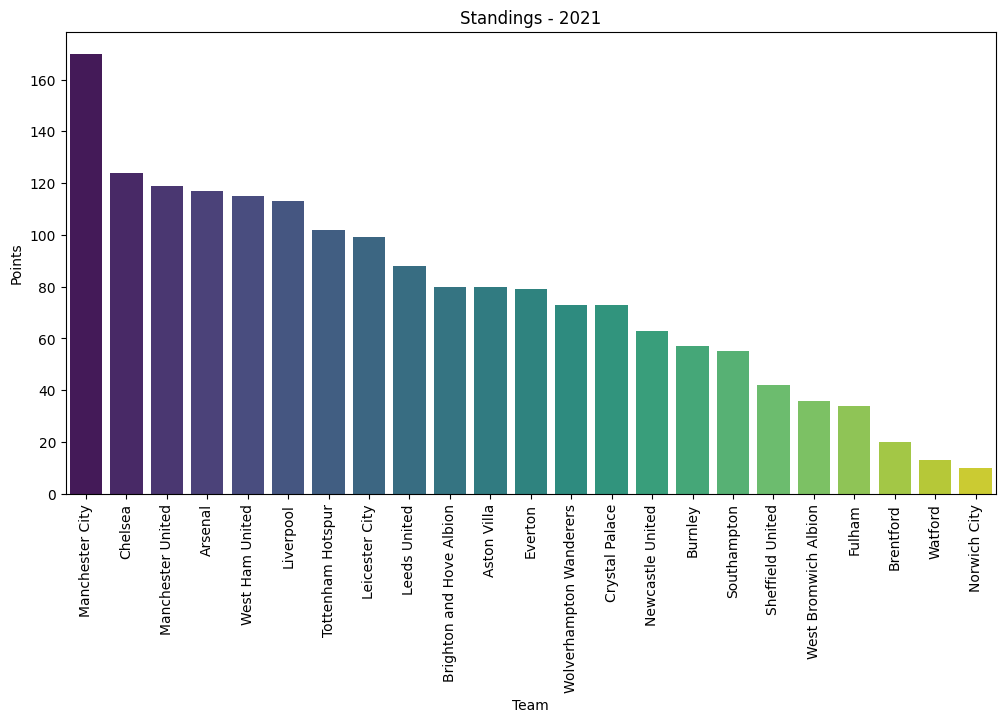

,total_shots,total_shots_on_target,average_shot_distance,total_fk_taken,total_pk_taken
team,,,,,
Arsenal,847,273,18.028571,32,7
Aston Villa,785,263,17.871212,26,6
Brentford,199,64,16.600000,5,3
Brighton and Hove Albion,781,231,17.627419,35,7
Burnley,663,212,17.146774,21,6
Chelsea,952,329,17.356250,33,17
Crystal Palace,589,205,17.479365,24,5
Everton,664,214,17.419048,27,7
Fulham,538,148,17.978261,10,2


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots', palette='plasma')


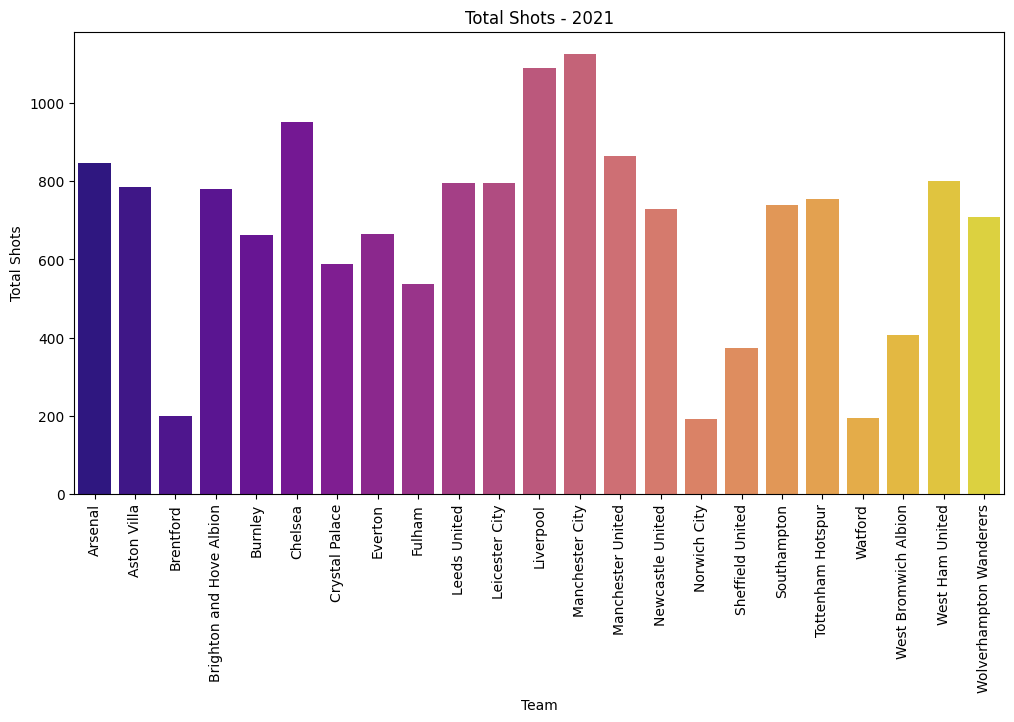

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots_on_target', palette='magma')


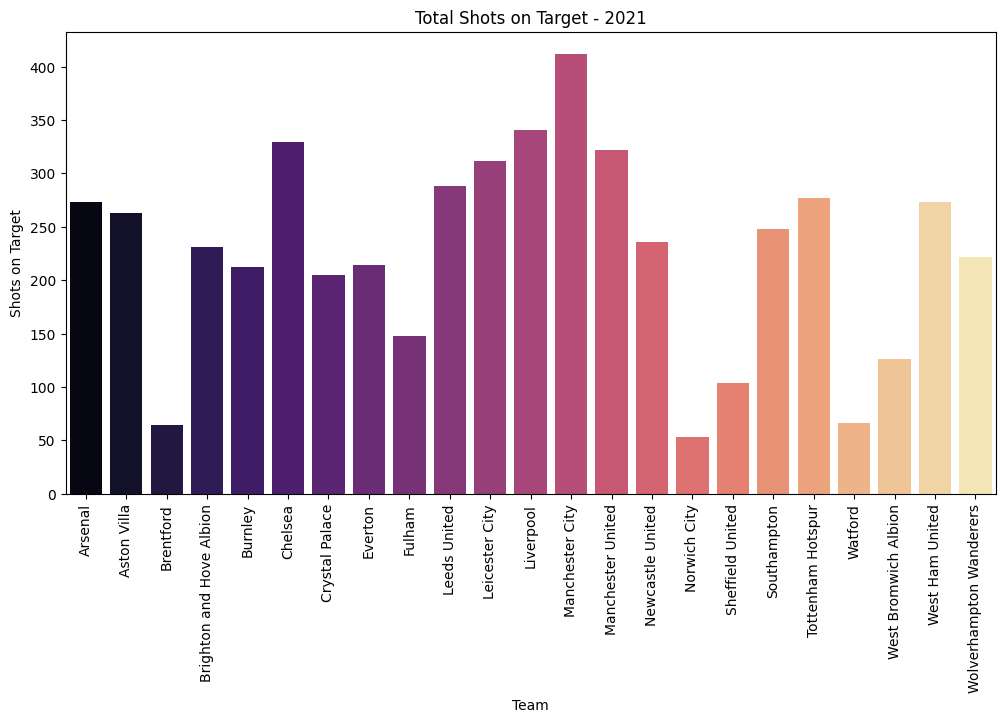

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='average_shot_distance', palette='coolwarm')


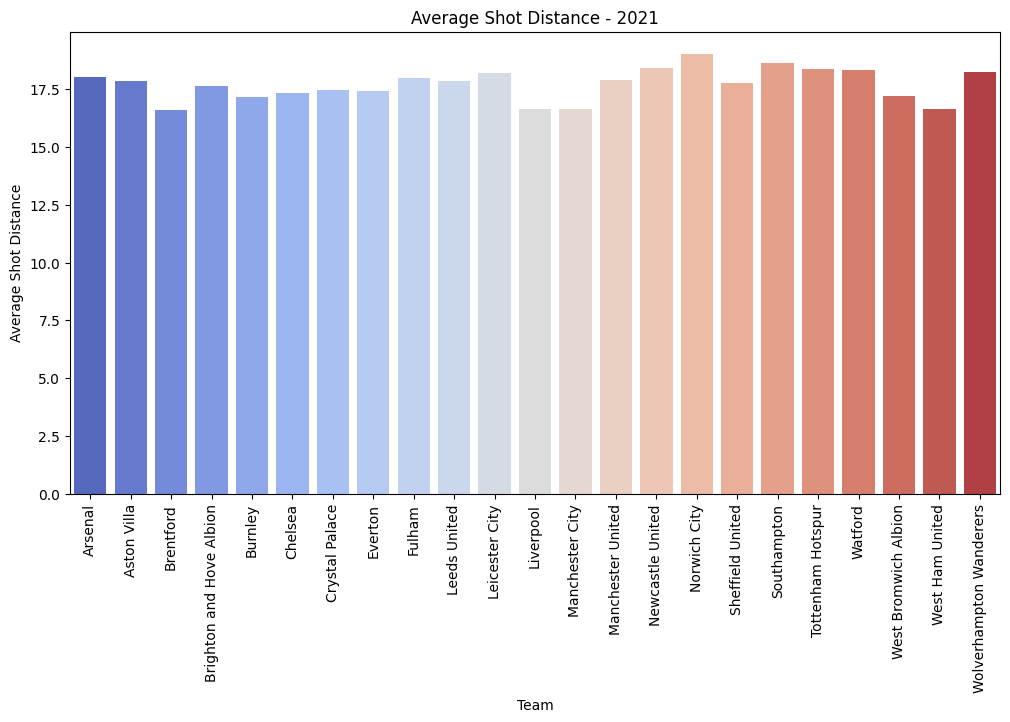

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_fk_taken', palette='crest')


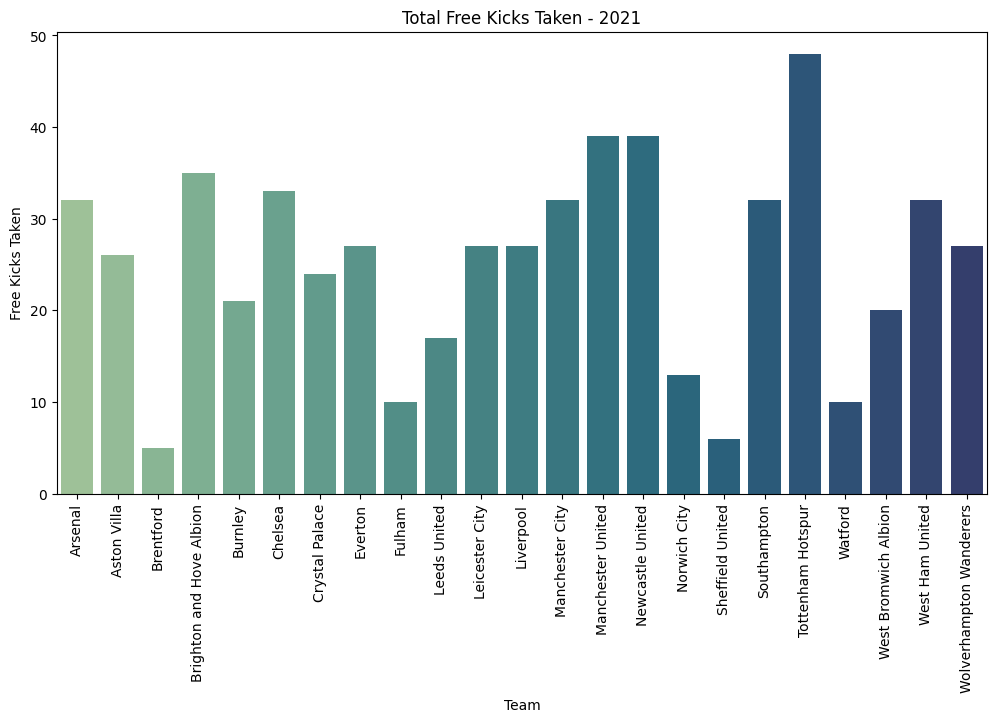

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_pk_taken', palette='cubehelix')


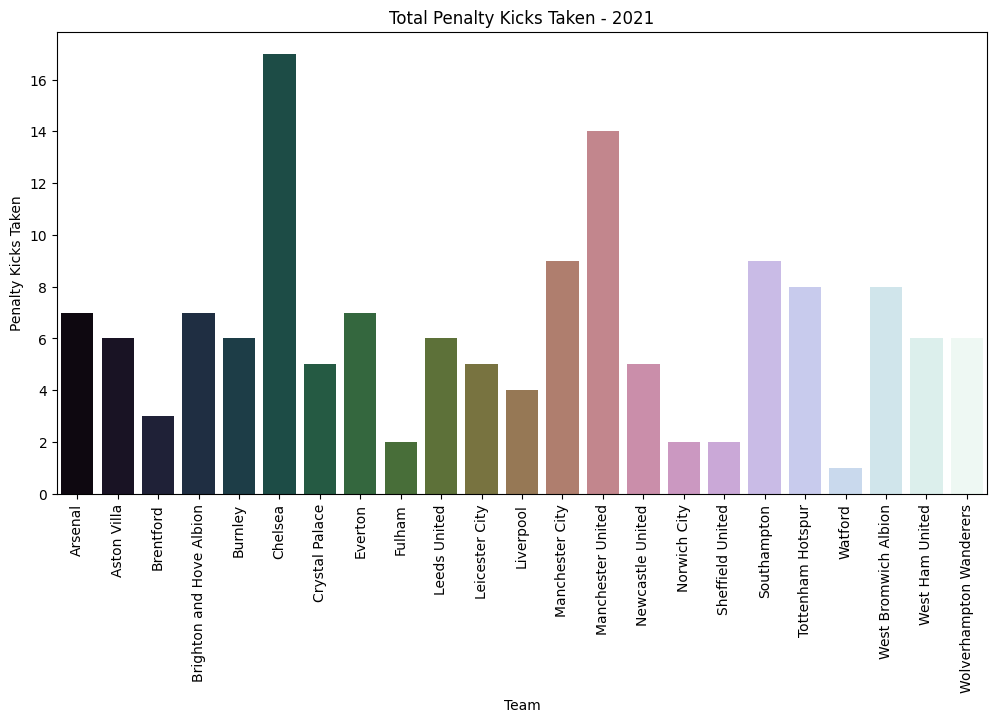

Manchester City With 1127 shots
Manchester City With 412 shots on target
Norwich City With 19.03684210526316 yards average shots
Tottenham Hotspur With 48 Free kicks taken
Chelsea With 17 Penalty kicks taken


In [28]:
import pandas as pd

def analyze_season(df, season_year):
    
    standings_df = df.groupby('team').agg(
        goals_scored=('gf', 'sum'),
        goals_conceded=('ga', 'sum'),
        wins=('result', lambda x: (x == 'W').sum()),
        draws=('result', lambda x: (x == 'D').sum()),
        losses=('result', lambda x: (x == 'L').sum())
    )

    standings_df['points'] = standings_df['wins'] * 3 + standings_df['draws']
    standings_df['goal_difference'] = standings_df['goals_scored'] - standings_df['goals_conceded']
    standings_df = standings_df.sort_values(by=['points', 'goal_difference'], ascending=False)
    standings_df = standings_df.reset_index()
    standings_df['rank'] = standings_df.index + 1

    print(f"Standings for {season_year}:")
    display(standings_df)

    
    print(standings_df.groupby('team')['goals_scored'].sum().idxmax(), 'with', standings_df.groupby('team')['goals_scored'].sum().max(), 'Goals Scored')
    print(standings_df.groupby('team')['goals_conceded'].sum().idxmin(), 'with', standings_df.groupby('team')['goals_conceded'].sum().min(), 'Goals Conceded')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=standings_df, x='team', y='points', palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Standings - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Points')
    plt.show()
    
    team_stats = df.groupby('team').agg(
        total_shots=('sh', 'sum'),
        total_shots_on_target=('sot', 'sum'),
        average_shot_distance=('dist', 'mean'),
        total_fk_taken=('fk', 'sum'),
        total_pk_taken=('pk', 'sum')
    )
    display(team_stats)

    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots', palette='plasma')
    plt.xticks(rotation=90)
    plt.title(f'Total Shots - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Total Shots')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots_on_target', palette='magma')
    plt.xticks(rotation=90)
    plt.title(f'Total Shots on Target - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Shots on Target')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_stats.reset_index(), x='team', y='average_shot_distance', palette='coolwarm')
    plt.xticks(rotation=90)
    plt.title(f'Average Shot Distance - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Average Shot Distance')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_stats.reset_index(), x='team', y='total_fk_taken', palette='crest')
    plt.xticks(rotation=90)
    plt.title(f'Total Free Kicks Taken - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Free Kicks Taken')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_stats.reset_index(), x='team', y='total_pk_taken', palette='cubehelix')
    plt.xticks(rotation=90)
    plt.title(f'Total Penalty Kicks Taken - {season_year}')
    plt.xlabel('Team')
    plt.ylabel('Penalty Kicks Taken')
    plt.show()

    team_most_shots = team_stats['total_shots'].idxmax()
    most_shots = team_stats['total_shots'].max()
    print(team_most_shots, 'With', most_shots, 'shots')

    
    team_most_shots_on_target = team_stats['total_shots_on_target'].idxmax()
    most_shots_on_target = team_stats['total_shots_on_target'].max()
    print(team_most_shots_on_target, 'With', most_shots_on_target, 'shots on target')

    
    team_most_longshots = team_stats['average_shot_distance'].idxmax()
    most_longshots = team_stats['average_shot_distance'].max()
    print(team_most_longshots, 'With', most_longshots, 'yards average shots')

    
    team_most_fk = team_stats['total_fk_taken'].idxmax()
    most_fk = team_stats['total_fk_taken'].max()
    print(team_most_fk, 'With', most_fk, 'Free kicks taken')

    
    team_most_pk = team_stats['total_pk_taken'].idxmax()
    most_pk = team_stats['total_pk_taken'].max()
    print(team_most_pk, 'With', most_pk, 'Penalty kicks taken')

    


analyze_season(season2021_df, '2021')



## Season 2022 Analysis

Standings for 2022:


,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,92,30,24,7,3,79,62,1
1,Liverpool,77,29,24,7,4,79,48,2
2,Arsenal,69,39,25,2,8,77,30,3
3,Newcastle United,57,31,21,9,6,72,26,4
4,Tottenham Hotspur,80,43,22,5,10,71,37,5
5,Manchester United,51,51,17,8,11,59,0,6
6,Chelsea,52,36,16,8,9,56,16,7
7,Brighton and Hove Albion,53,50,14,9,13,51,3,8
8,Brentford,54,58,13,10,14,49,-4,9
9,Crystal Palace,40,40,12,11,12,47,0,10


Manchester City with 92 Goals Scored
Fulham with 27 Goals Conceded


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=standings_df, x='team', y='points', palette='viridis')


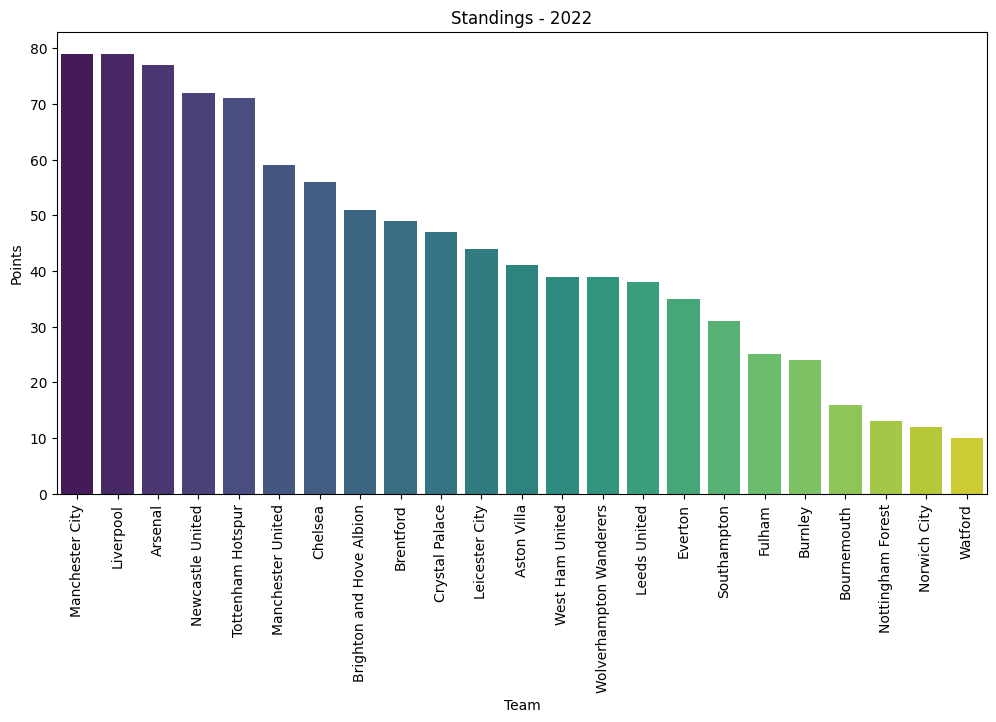

,total_shots,total_shots_on_target,average_shot_distance,total_fk_taken,total_pk_taken
team,,,,,
Arsenal,553,178,17.085714,17,5
Aston Villa,438,162,17.900000,18,3
Bournemouth,137,54,16.188235,6,0
Brentford,407,145,16.229730,12,7
Brighton and Hove Albion,469,152,16.980556,7,4
Burnley,232,65,17.772727,7,1
Chelsea,454,154,17.209091,13,3
Crystal Palace,364,133,17.111429,17,3
Everton,401,123,17.450000,16,3


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots', palette='plasma')


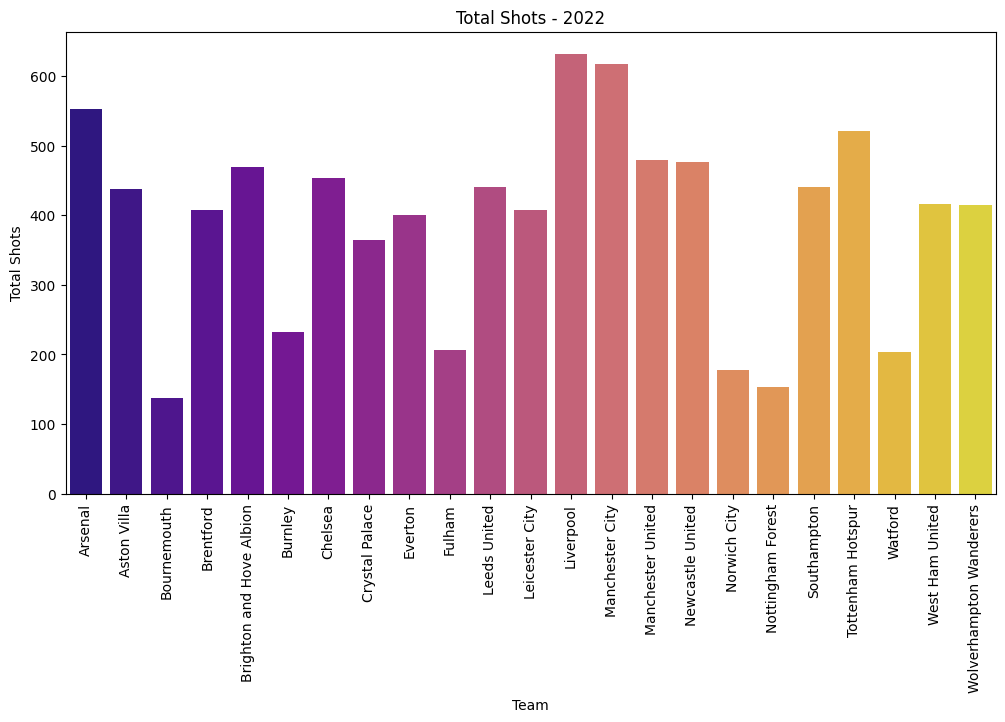

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots_on_target', palette='magma')


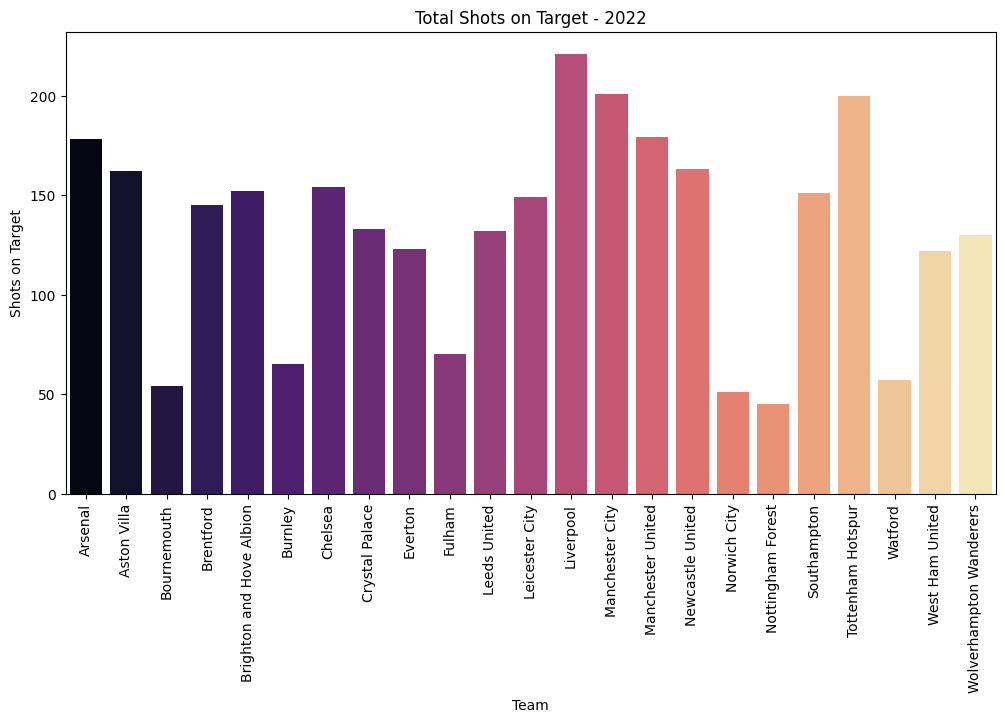

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='average_shot_distance', palette='coolwarm')


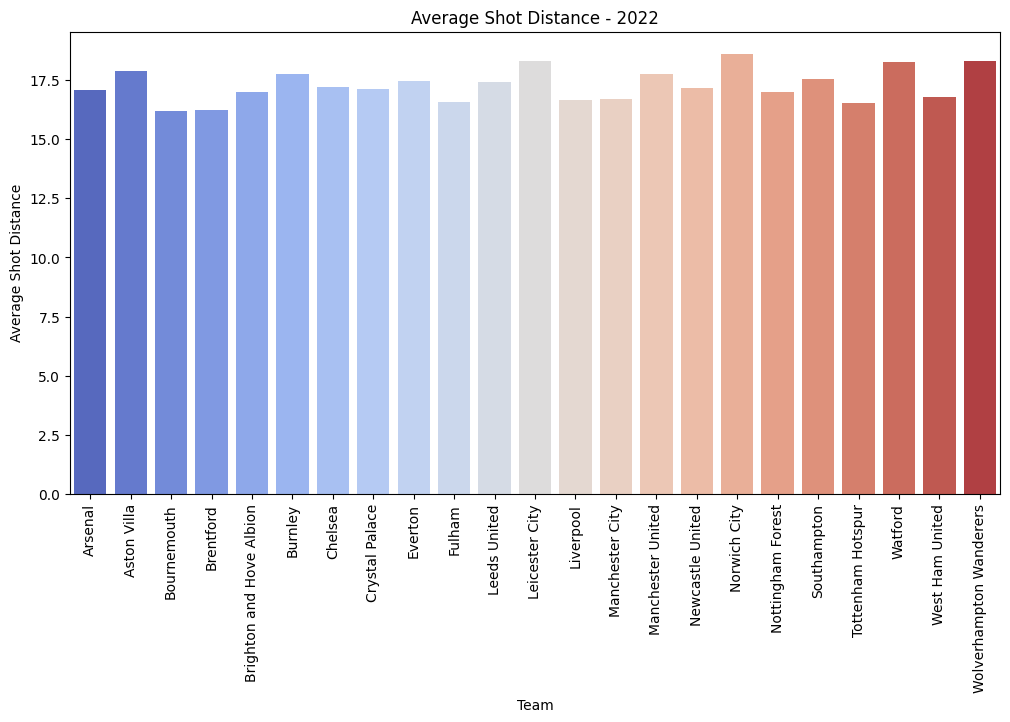

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_fk_taken', palette='crest')


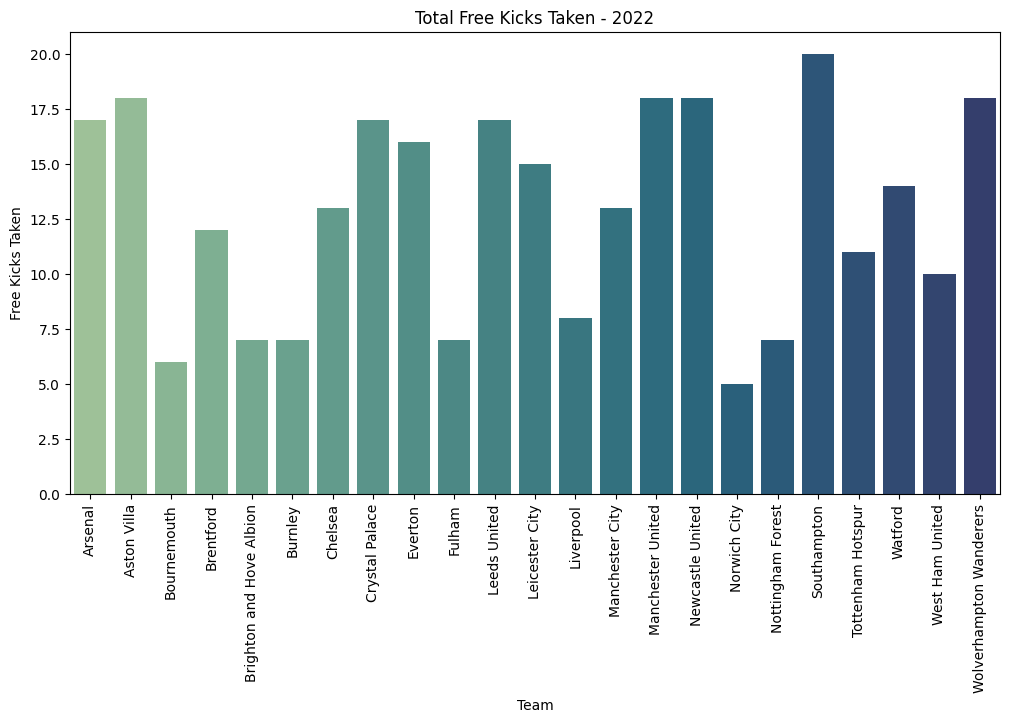

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_pk_taken', palette='cubehelix')


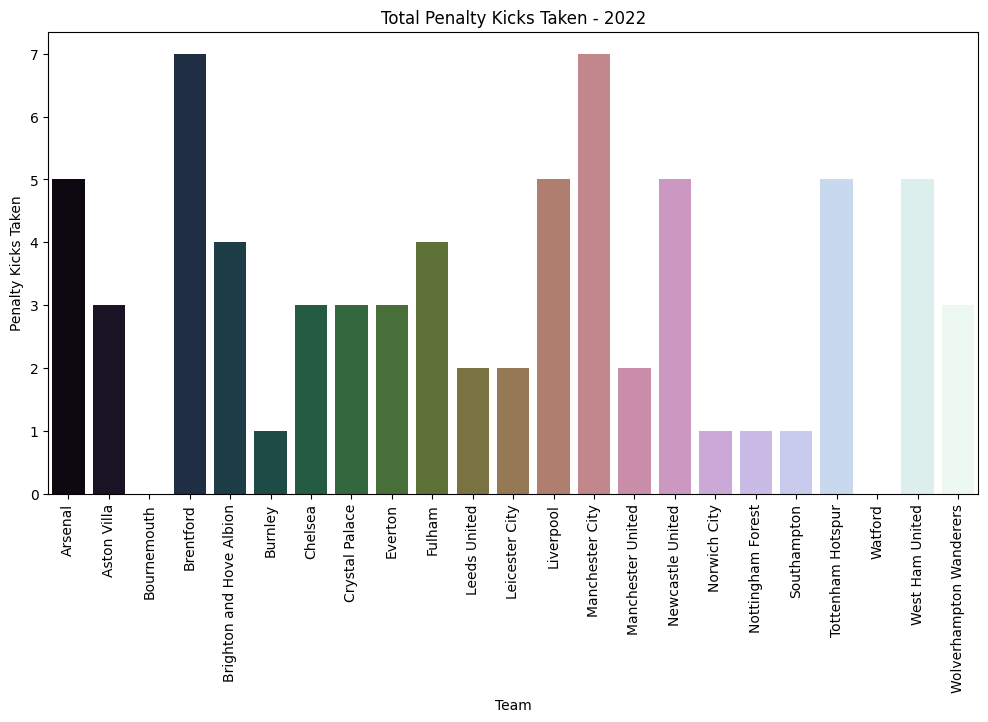

Liverpool With 632 shots
Liverpool With 221 shots on target
Norwich City With 18.621052631578948 yards average shots
Southampton With 20 Free kicks taken
Brentford With 7 Penalty kicks taken


In [29]:
analyze_season(season2022_df, '2022')

## Season 2023 Analysis

Standings for 2023:


,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,95,38,29,6,6,93,57,1
1,Aston Villa,77,48,26,7,9,85,29,2
2,Liverpool,81,44,23,12,6,81,37,3
3,Arsenal,85,49,24,9,9,81,36,4
4,Manchester United,56,50,23,5,14,74,6,5
5,Tottenham Hotspur,79,69,21,6,15,69,10,6
6,Brighton and Hove Albion,82,62,19,11,11,68,20,7
7,Newcastle United,73,47,19,9,12,66,26,8
8,West Ham United,62,63,17,8,15,59,-1,9
9,Wolverhampton Wanderers,51,63,16,8,17,56,-12,10


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=standings_df, x='team', y='points', palette='viridis')


Manchester City with 95 Goals Scored
Luton Town with 37 Goals Conceded


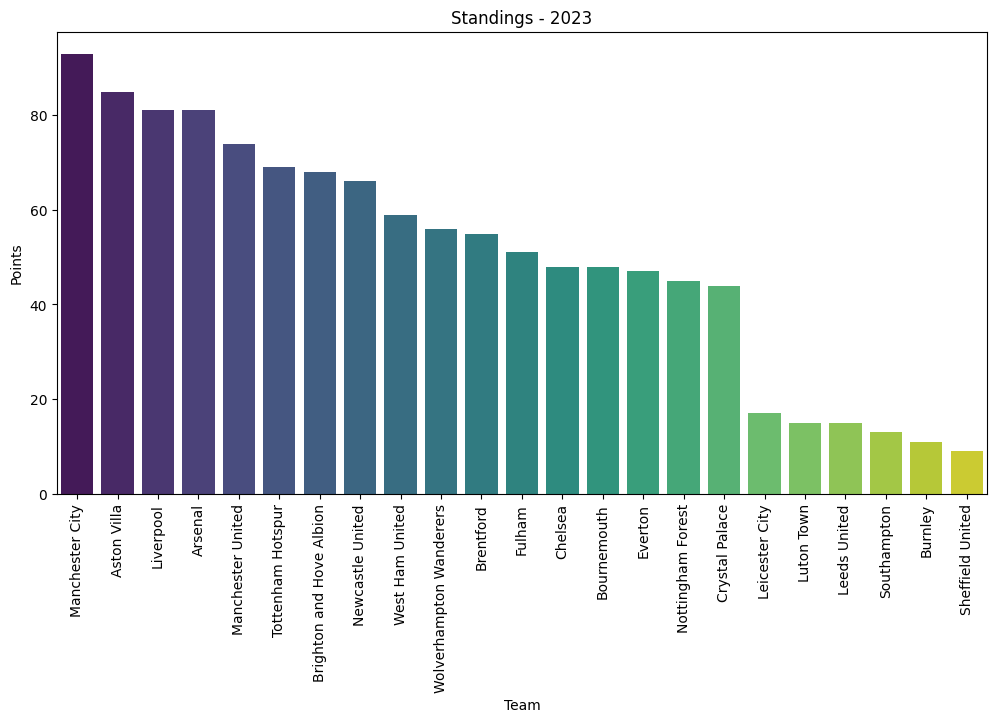

,total_shots,total_shots_on_target,average_shot_distance,total_fk_taken,total_pk_taken
team,,,,,
Arsenal,657,203,16.188095,10,8
Aston Villa,542,185,17.321429,20,5
Bournemouth,475,161,15.527500,16,1
Brentford,483,152,15.770000,15,6
Brighton and Hove Albion,681,256,16.809756,16,7
Burnley,208,63,17.440000,5,1
Chelsea,574,183,16.993023,21,7
Crystal Palace,485,153,16.942857,25,4
Everton,532,177,16.697561,12,3


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots', palette='plasma')


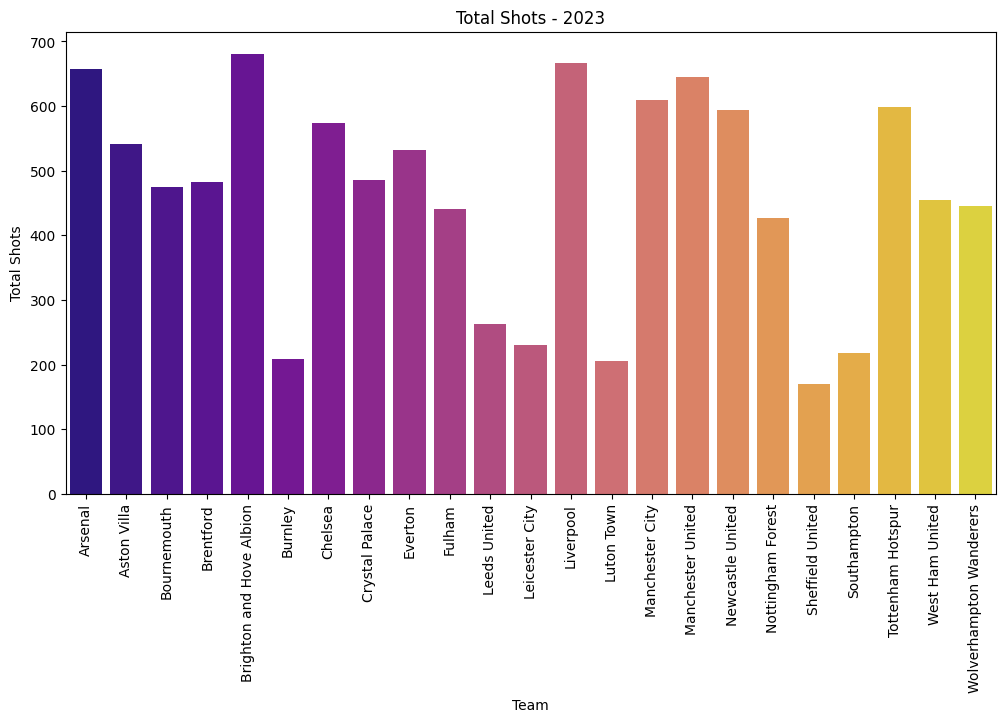

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots_on_target', palette='magma')


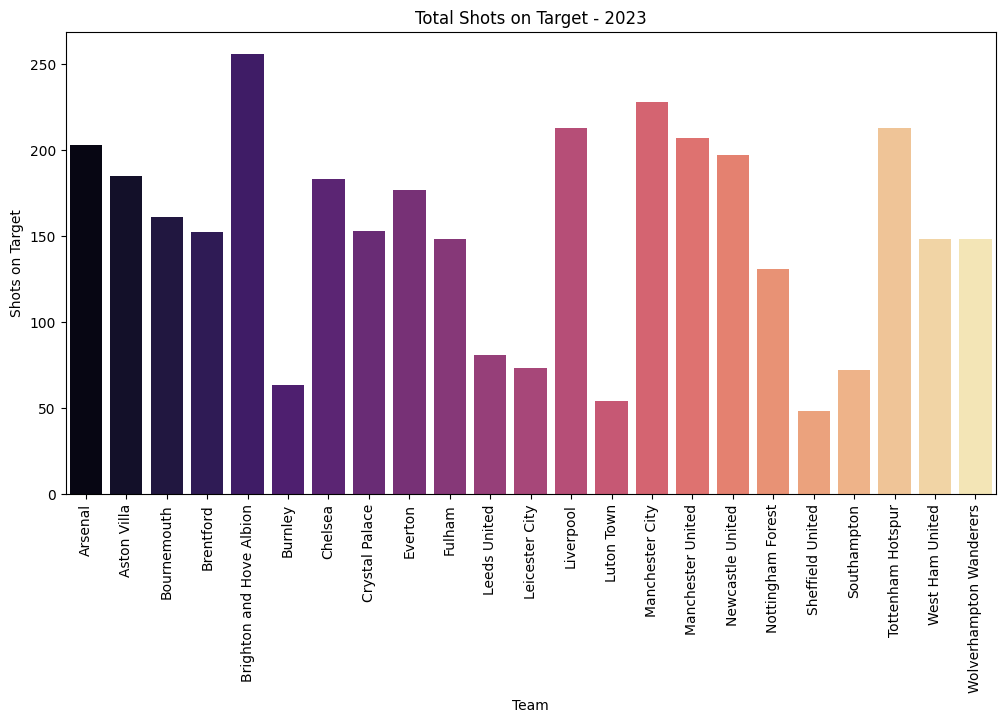

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='average_shot_distance', palette='coolwarm')


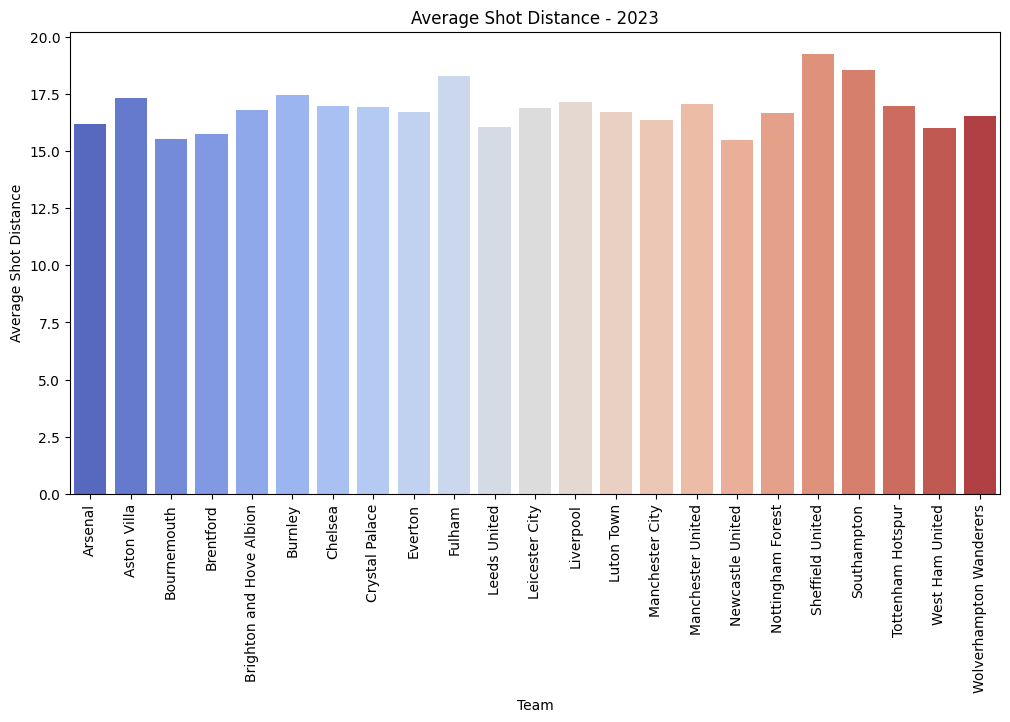

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_fk_taken', palette='crest')


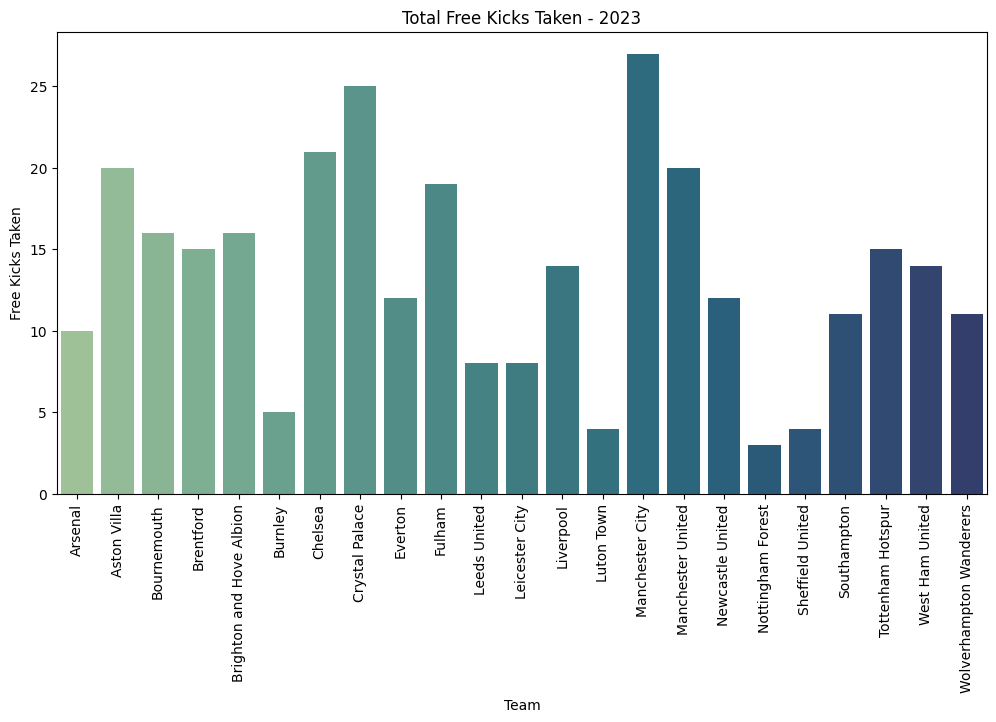

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_pk_taken', palette='cubehelix')


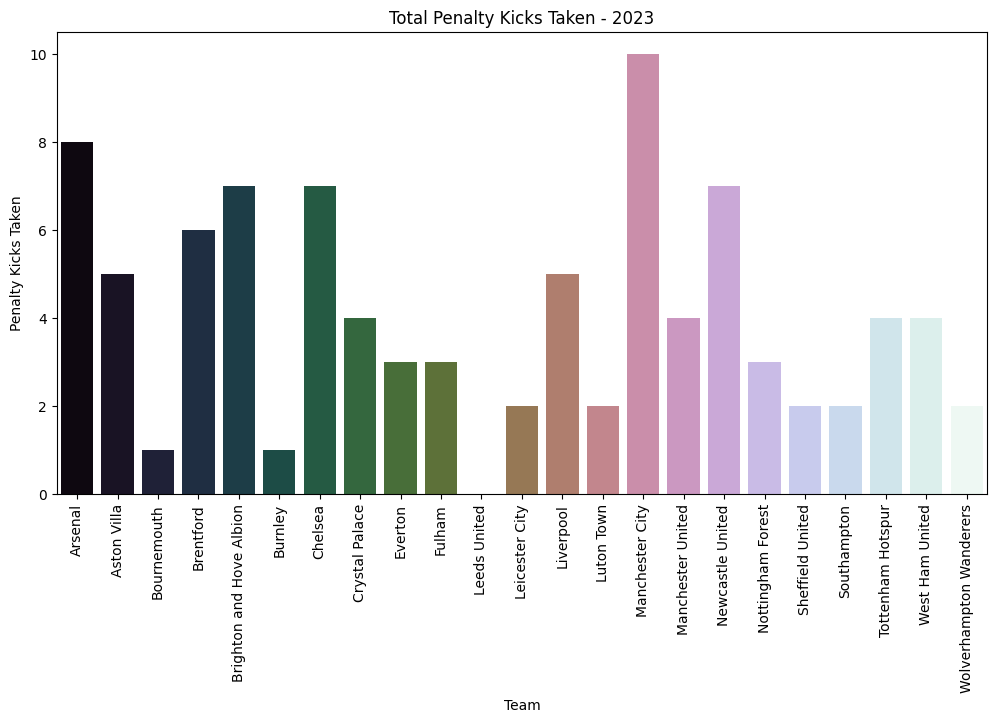

Brighton and Hove Albion With 681 shots
Brighton and Hove Albion With 256 shots on target
Sheffield United With 19.265 yards average shots
Manchester City With 27 Free kicks taken
Manchester City With 10 Penalty kicks taken


In [30]:
analyze_season(season2023_df, '2023')

## Season 2024 Analysis

Standings for 2024:


,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,51,13,16,3,0,51,38,1
1,Arsenal,54,9,16,1,1,49,45,2
2,Liverpool,47,25,12,4,3,40,22,3
3,Chelsea,43,32,10,5,3,35,11,4
4,Newcastle United,48,37,9,4,6,31,11,5
5,Manchester United,35,31,8,5,5,29,4,6
6,Crystal Palace,35,29,8,4,6,28,6,7
7,Tottenham Hotspur,32,32,8,3,7,27,0,8
8,Aston Villa,33,34,7,5,6,26,-1,9
9,Fulham,27,26,6,5,7,23,1,10


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=standings_df, x='team', y='points', palette='viridis')


Arsenal with 54 Goals Scored
Arsenal with 9 Goals Conceded


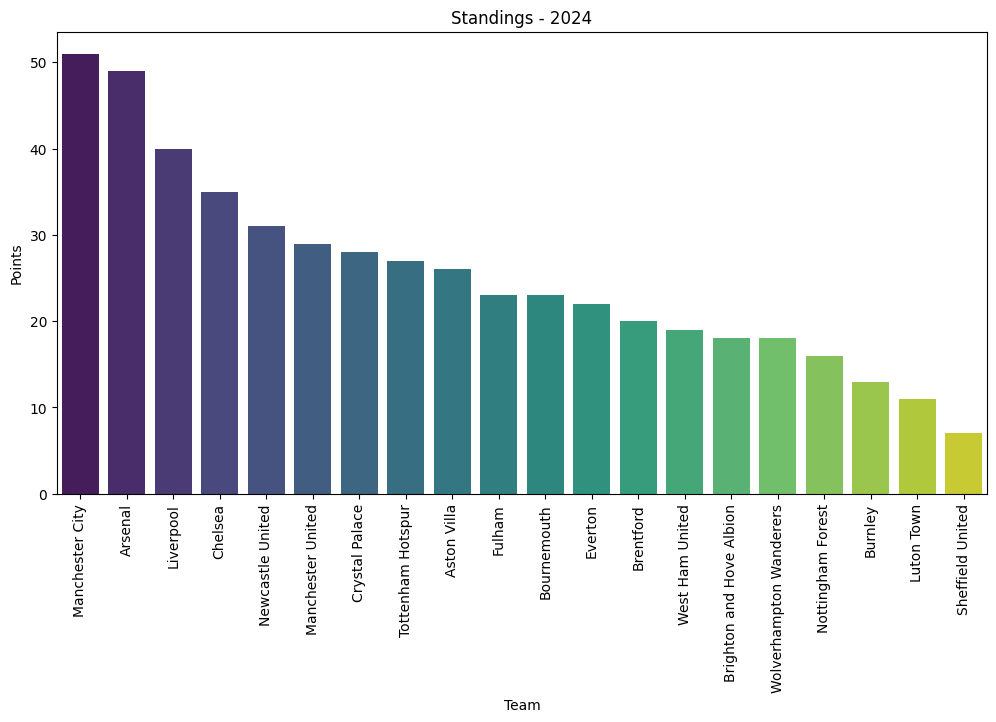

,total_shots,total_shots_on_target,average_shot_distance,total_fk_taken,total_pk_taken
team,,,,,
Arsenal,328,111,15.477778,4,4
Aston Villa,222,80,15.516667,7,0
Bournemouth,285,86,17.226316,10,1
Brentford,217,86,16.084211,10,0
Brighton and Hove Albion,273,83,16.468421,2,1
Burnley,222,74,17.450000,8,2
Chelsea,275,105,17.177778,9,5
Crystal Palace,219,84,17.400000,8,1
Everton,227,61,17.544444,9,2


C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots', palette='plasma')


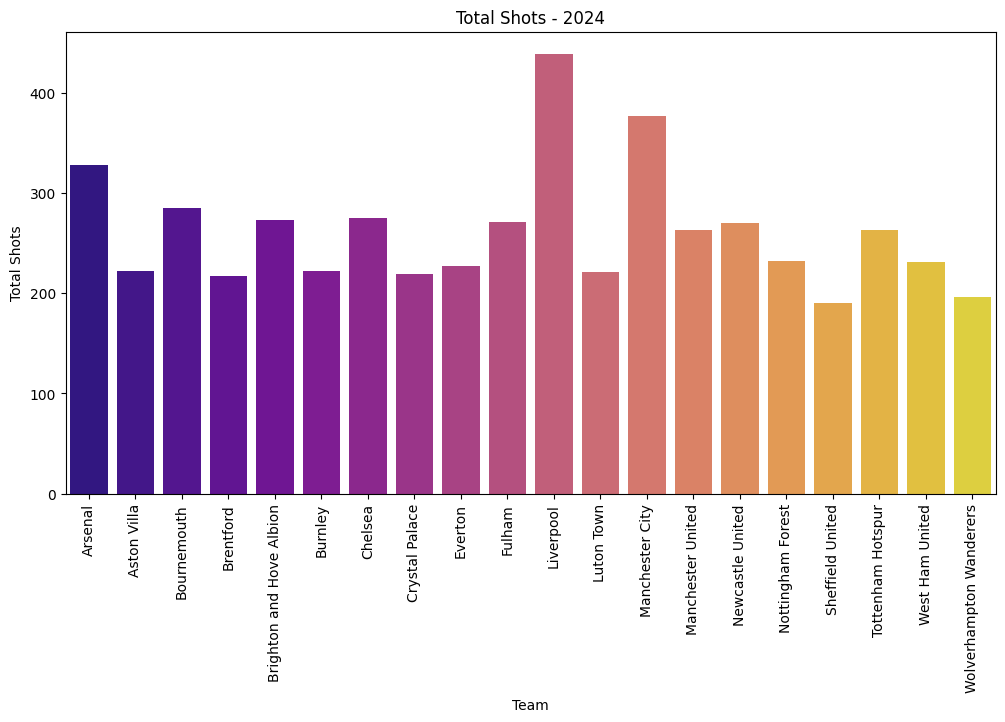

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_shots_on_target', palette='magma')


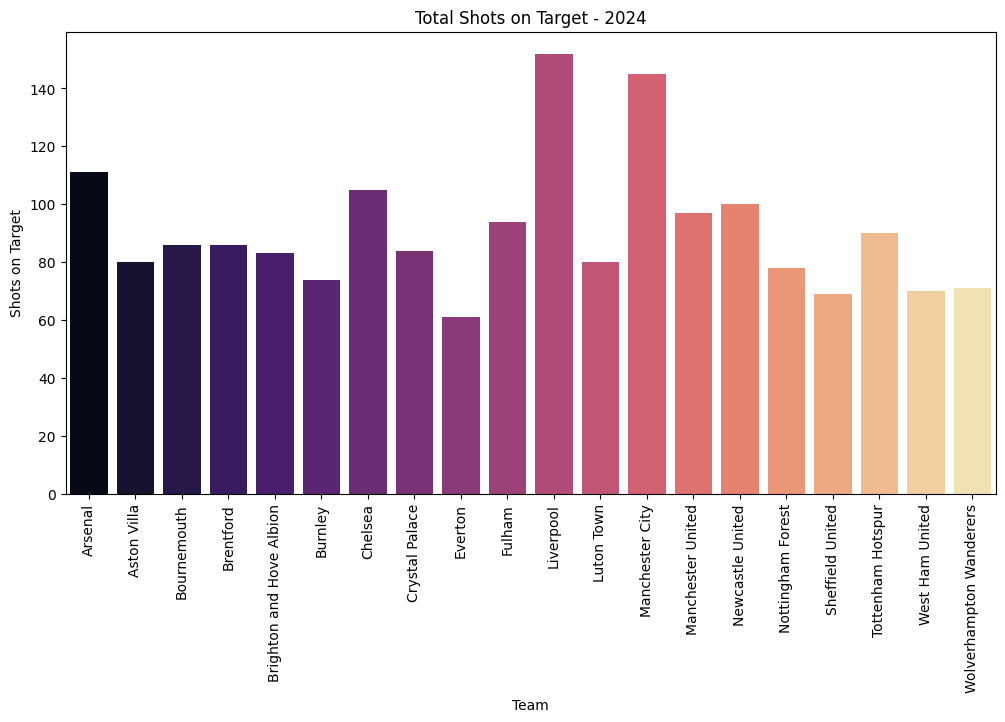

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='average_shot_distance', palette='coolwarm')


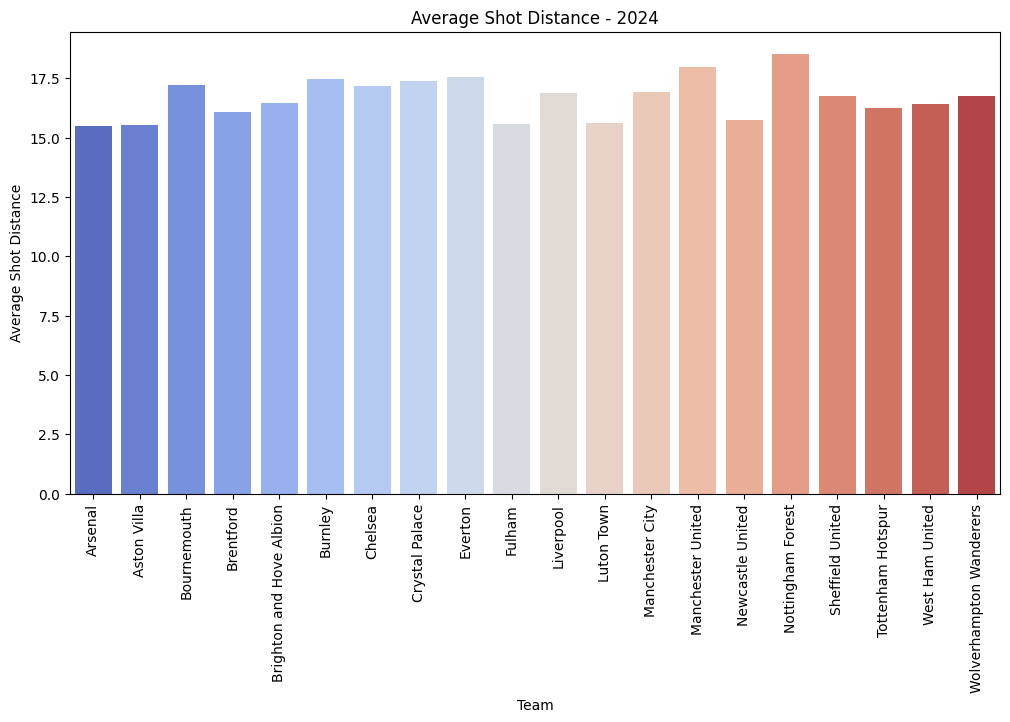

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_fk_taken', palette='crest')


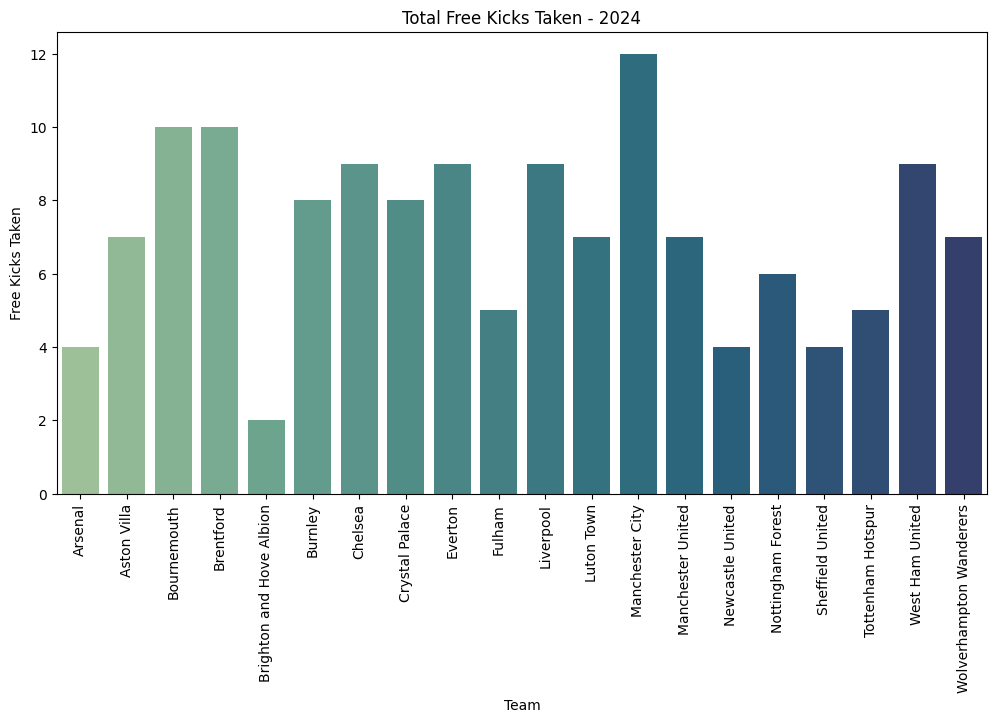

C:\Users\abdel\AppData\Local\Temp\ipykernel_28240\1876164705.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats.reset_index(), x='team', y='total_pk_taken', palette='cubehelix')


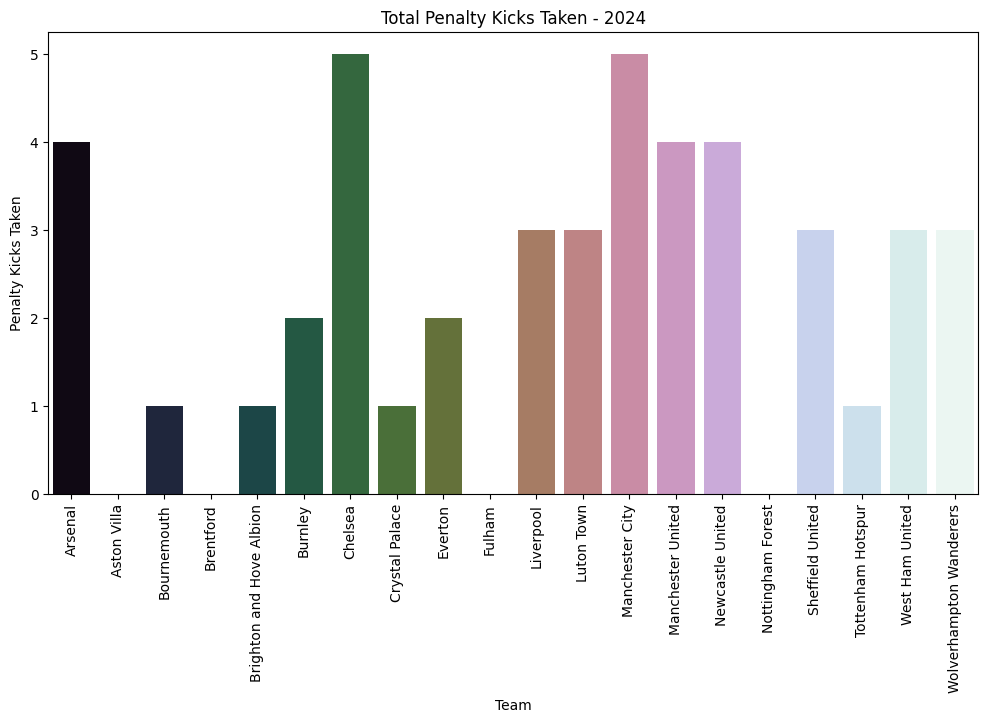

Liverpool With 439 shots
Liverpool With 152 shots on target
Nottingham Forest With 18.533333333333335 yards average shots
Manchester City With 12 Free kicks taken
Chelsea With 5 Penalty kicks taken


In [31]:
analyze_season(season2024_df, '2024')

# Seasons Summary

## Season 2020

### Teams Stats

- Title Winner ***LiverPool***

- Team with most goals scored ***LiverPool*** with 150 goals scored

- Team with least goals conceded ***Watford*** with 31 goals conceded

- Team with most shots ***Manchester City*** with 1110 shots

- Team with most shots on target ***LiverPool*** with 408 shots on target

- Team with most Freekick taken ***Tottenham Hotspur*** with 52 Freekicks

- Team with most Penalty Kick taken ***Leicester City*** with 20 Penalties

## Season 2021

### Teams Stats

- Title Winner ***Manchester City***

- Team with most goals scored ***Manchester City*** with 175 goals scored

- Team with least goals conceded ***Brentford*** with 25 goals conceded

- Team with most shots ***Manchester City*** with 1127 shots

- Team with most shots on target ***Manchester City*** with 412 shots on target

- Team with most Freekick taken ***Tottenham Hotspur*** with 48 Freekicks

- Team with most Penalty Kick taken ***Chelsea*** with 17 Penalties


## Season 2022

### Teams Stats

- Title Winner ***Manchester City***

- Team with most goals scored ***Manchester City*** with 92 goals scored

- Team with least goals conceded ***Fulham*** with 27 goals conceded

- Team with most shots ***LiverPool*** with 632 shots

- Team with most shots on target ***LiverPool*** with 221 shots on target

- Team with most Freekick taken ***Southampton*** with 20 Freekicks

- Team with most Penalty Kick taken ***Brentford*** with 7 Penalties


## Season 2023

### Teams Stats

- Title Winner ***Manchester City***

- Team with most goals scored ***Manchester City*** with 95 goals scored

- Team with least goals conceded ***Luton Town*** with 37 goals conceded

- Team with most shots ***Brighton and Hove Albion*** with 681 shots

- Team with most shots on target ***Brighton and Hove Albion*** with 256 shots on target

- Team with most Freekick taken ***Manchester City*** with 27 Freekicks

- Team with most Penalty Kick taken ***Manchester City*** with 10 Penalties


## Season 2024 (Live)

### Live Teams Stats

- Expected Title Winner ***Manchester City***

- Team with most goals scored ***Arsenal*** with 54 goals scored

- Team with least goals conceded ***Arsenal*** with 9 goals conceded

- Team with most shots ***LiverPool*** with 439 shots

- Team with most shots on target ***Liverpool*** with 152 shots on target

- Team with most Freekick taken ***Manchester City*** with 12 Freekicks

- Team with most Penalty Kick taken ***Chelsea*** with 5 Penalties


## Data problem

- Total matches played is not right in season 2020, 2021